# P3
## 本週重點
* 本週除了講述IF的邏輯敘述外，將開始回顧到第一週所說的，資料的計數。
* 看到一筆類似空氣品質的資料，一般會想要做什麼事？
    1. 找到突出的（Prominent）資料：找到最嚴重的地區。如果最嚴重的地區不只一個，那就要列印出多個地區。
    2. 找到突出的（Prominent）資料：不僅找到最嚴重的地區，還要找到前三大、前五大、前10%。
    3. 描述資料分佈概況。例如平均值、四分位數、左/右傾分佈（常態分配、Power low）
    4. 篩選出一些我想看的資料。
* 為什麼要找到這些資料的概況？簡單地說，是為了讓一般人聽得懂，但要求有憑有據。只有資料的分析者和操作者看得到資料，但重點是你今天通常為什麼要做資料分析，是因為你想要傳達給別人，這筆資料有啥特殊之處，或者他平淡無奇。但為了做到這點，你需要用一個他們都聽得懂的語彙，例如「大部分的區域」、「最嚴重的區域」、「前幾大」。然而，這些語彙的邏輯實際上都模糊而不準確，但若你有資料和數學的支持，你就可以說得有信心，有憑有據，而不至於信口開河。

## 授課內容
* if的邏輯
    * 選擇性列印出你所要呈現的youbike站台
        * 指定要某幾個
        * 指定要滿載的
        * 指定要少的
    * 找到最大值和最小值
    * 處理缺漏值，AQX不定期地會有缺漏值，要用if來偵測是否有缺漏值，並指定遇到缺漏值要怎麼做處理。
    * 範例：查驗輸入的日期是否合理
* if-for應用
    * 計算文字的出現次數counting and ploting the word frequency
    * 找到最大或者是前三大的PM2.5站台finding the maximum and top 3 PM2.5 sites
    * 練習與作業：Rescaling the PM2.5 values。將PM2.5對應到1~10好進行視覺化或者發佈一般使用者聽得懂的數據（例如，若告訴一個使用者PM2.5是67，他可能不知道這個數字代表什麼意義，但你若透過一個標準的Mapping把它mapping到高，並告訴使用者說現在這個區域PM2.5是高，那他就聽得懂，而你的轉換也有憑有據）。
* Converting and storing the data as your own format.

# IF
* if: 如果「此敘述為真」，那就做以下的操作。

In [1]:
print (5 in range(10))
print (10 in range(10))
if not (5 in range(10)):
    print "hahaha"
if not (10 in range(10)):
    print "hehehe"
a, b, c = 3, 5, 7
if a < b and b < c:
    print "YES"
if 1 < b < 10:
    print "YES"

True
False
hehehe
YES
YES


In [3]:
def whatisthis(s):
    if isinstance(s, str):
        print "ordinary string"
    elif isinstance(s, unicode):
        print "unicode string"
    else:
        print "not a string"

In [5]:
print whatisthis(raw_input("testing >"))

testing >我是誰
ordinary string
None


## logic operation:  邏輯運算
* and
* or
* not
* <, >, <=, >=, ==(equal to), !=(not equal to)

In [3]:
a = 3
b = 4
c = 7
d, e, f = 7, 8, 9 # suitable for assigning value with the same type
print a+b != c

False


In [3]:
# a is b, a is not b
# a == b
a, b, c = 1, 1.0, '1'

# == equal to
if (a == b):
    print "a == b"
else:
    print "a != b"

# is
if a is b:
    print "a is b"
else:
    print "a is not b"


a == b
a is not b


## [for-if] e.g., Youbike: 僅列印出你所要觀察的Youbike站台。

In [1]:
import urllib
import json
import gzip
url = 'http://data.taipei/youbike'

urllib.urlretrieve(url, "data.gz")
data_str = gzip.open('data.gz', 'r').read()
bike_data = json.loads(data_str)
print bike_data["retVal"].values()[0]['mday']
for site in bike_data["retVal"].keys():
    if site in ['0036', '0038', '0132']:
        print "%s\t%-20s\t%s\t%s"%(bike_data["retVal"][site]["sno"], 
                                   bike_data["retVal"][site]["sna"], 
                                   bike_data["retVal"][site]['sbi'],
                                   bike_data["retVal"][site]['tot'])
# for site in ['0036', '0038', '0132']:
#     print "%s\t%-20s\t%s\t%s"%(bike_data["retVal"][site]["sno"], 
#                                bike_data["retVal"][site]["sna"], 
#                                bike_data["retVal"][site]['sbi'],
#                                bike_data["retVal"][site]['tot'])

20160321230441
0038	臺灣師範大學(圖書館)         	6	34
0132	羅斯福新生南路口            	72	88
0036	臺大資訊大樓              	22	72


## [for-if] e.g. Counting the frequency

In [2]:
import string
sentences = 'All men have stars, but they are not the same things for different people. For some, who are travelers, the stars are guides. For others they are no more than little lights in the sky. For others, who are scholars, they are problems... But all these stars are silent. You-You alone will have stars as no one else has them... In one of the stars I shall be living. In one of them I shall be laughing. And so it will be as if all the stars will be laughing when you look at the sky at night..You, only you, will have stars that can laugh! And when your sorrow is comforted (time soothes all sorrows) you will be content that you have known me... You will always be my friend. You will want to laugh with me. And you will sometimes open your window, so, for that pleasure... It will be as if, in place of the stars, I had given you a great number of little bells that knew how to laugh'
# print sentences[3] # like a list
# print string.punctuation
exclude = set(string.punctuation)
# print set(string.punctuation)
sentences = ''.join(ch for ch in sentences if ch not in exclude)
sentences = sentences.lower()
print sentences
# print sentences

sentences = "all men have stars but they are not the same things for different people for some who are travelers the stars are guides for others they are no more than little lights in the sky for others who are scholars they are problems but all these stars are silent youyou alone will have stars as no one else has them in one of the stars i shall be living in one of them i shall be laughing and so it will be as if all the stars will be laughing when you look at the sky at nightyou only you will have stars that can laugh and when your sorrow is comforted time soothes all sorrows you will be content that you have known me you will always be my friend you will want to laugh with me and you will sometimes open your window so for that pleasure it will be as if in place of the stars i had given you a great number of little bells that knew how to laugh"
wdict = {}

word_list = sentences.split() # split() is a string function
for word in word_list:
    if word not in wdict:
        wdict[word] = 0
    wdict[word] += 1
#     wdict[word] = wdict[word] + 1
for word, freq in wdict.items():
    print word, freq

all men have stars but they are not the same things for different people for some who are travelers the stars are guides for others they are no more than little lights in the sky for others who are scholars they are problems but all these stars are silent youyou alone will have stars as no one else has them in one of the stars i shall be living in one of them i shall be laughing and so it will be as if all the stars will be laughing when you look at the sky at nightyou only you will have stars that can laugh and when your sorrow is comforted time soothes all sorrows you will be content that you have known me you will always be my friend you will want to laugh with me and you will sometimes open your window so for that pleasure it will be as if in place of the stars i had given you a great number of little bells that knew how to laugh
all 4
nightyou 1
guides 1
sky 2
to 2
window 1
soothes 1
has 1
them 2
they 3
not 1
always 1
laughing 2
people 1
some 1
are 7
living 1
for 5
content 1
light

In [23]:
# -*- coding: utf-8 -*-
sentences = '和尚端湯上塔塔滑湯灑湯燙塔和尚端塔上湯湯滑塔灑塔燙湯'
cdict = {}
for ch in sentences.decode('utf-8'):
    if not cdict.has_key(ch):
        cdict[ch] = 0
    cdict[ch] += 1
print cdict
for ch, f in cdict.items():
    print ch, f

{u'\u7051': 2, u'\u4e0a': 2, u'\u548c': 2, u'\u6e6f': 6, u'\u6ed1': 2, u'\u7aef': 2, u'\u71d9': 2, u'\u5c1a': 2, u'\u5854': 6}
灑 2
上 2
和 2
湯 6
滑 2
端 2
燙 2
尚 2
塔 6


/Users/jirlong/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


9 will
8 you
8 stars
7 the
7 be


(array([ 51.,  17.,   6.,   5.,   0.,   1.,   0.,   3.,   2.,   1.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

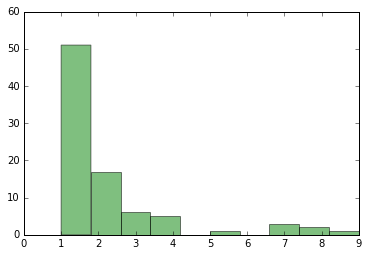

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import string
sentences = 'All men have stars, but they are not the same things for different people. For some, who are travelers, the stars are guides. For others they are no more than little lights in the sky. For others, who are scholars, they are problems... But all these stars are silent. You-You alone will have stars as no one else has them... In one of the stars I shall be living. In one of them I shall be laughing. And so it will be as if all the stars will be laughing when you look at the sky at night..You, only you, will have stars that can laugh! And when your sorrow is comforted (time soothes all sorrows) you will be content that you have known me... You will always be my friend. You will want to laugh with me. And you will sometimes open your window, so, for that pleasure... It will be as if, in place of the stars, I had given you a great number of little bells that knew how to laugh'
sentences = sentences.translate(None, string.punctuation) #strip all punctuation
sentences = sentences.lower() # convert all letters to lower case
wdict = {}
for word in sentences.split(): # calculate word frequency
    if word not in wdict:
        wdict[word] = 0
    wdict[word] += 1
for f, q in sorted(((freq, word) for word, freq in wdict.items()), reverse=True)[:5]: # sort by word frequency and print out top 5 words
    print f, q
plt.hist(wdict.values(), facecolor='green', alpha=0.5)# plot hist:histogram

## [for-if] e.g. finding maximum AQX 找到PM2.5最大的區域
* [PM2.5 introduced by 行政院環保署](http://taqm.epa.gov.tw/pm25/tw/default.aspx)
* 以下這是個非常好的例子說明要如何運用IF和For找出PM2.5最高的地區。在過程中，必須要注意，原本的資料的資料型態為何，甚至要注意，原本的資料是否有缺漏。當遇到下面這種資料的情形時，最好的方法是要先寫程式把資料處理過一遍。
* 在這個案例中，我希望找出，現在PM2.5最高的是哪些站台，且把該站台列印出來。注意，我要列印的是，PM2.5最高的站台，而不是最高的PM2.5值；此外還要注意，PM2.5最高的站台可能不只一個，這時候該怎麼處理？

### finding the maximum and minimum value
* 找到最大值或最小值的概念：就個人的邏輯思考一下，我要怎麼找到一群數的最小值？
* 解題邏輯：把第一個數先拿來當標準，之後確認過每個數，有沒有比這個數更小的，若有的話，最小值就是找到的那個數，沒有的話，那第一個數就是最小值。

In [34]:
# finding the maximum value
alist = [5, 3, 2, 4, 1, 3, 2, 4, 7, 82, 19, 23, 42]
# mina, maxa = 100, 0
mina = alist[0]
for a in alist:
    if a < mina:
        mina = a
#     print maxa, a
print mina
print min(alist), max(alist), sum(alist), len(alist), float(sum(alist))/len(alist)

1
1 82 197 13 15.1538461538


In [21]:
for a in alist:
    if a == mina:
        print a
print min(alist), max(alist)

1
1
1 42


In [37]:
import urllib
import json
url = 'http://opendata.epa.gov.tw/ws/Data/AQX/?format=json'
urllib.urlretrieve(url, "data.gz")
data_str = open('data.gz', 'r').read()
AQ_data = json.loads(data_str)

In [56]:
maxa = 0
max_SiteName = ""
print AQ_data[0].keys()
for site in AQ_data:
    if site['PM2.5'] == "":
        site['PM2.5'] = '-1'
#     print site['PM2.5']
    if int(site['PM2.5']) > maxa:
        maxa = int(site['PM2.5'])
print maxa

for site in AQ_data:
    if int(site['PM2.5']) >= maxa:
        print site['SiteName'], site['PM2.5']


[u'Status', u'PSI', u'CO', u'PM10', u'NO', u'MajorPollutant', u'WindDirec', u'FPMI', u'PublishTime', u'SO2', u'County', u'SiteName', u'WindSpeed', u'PM2.5', u'NOx', u'O3', u'NO2']
85
林園 85


In [58]:
print type(AQ_data)
print AQ_data[0].keys()
max_value = 0
for site in AQ_data:
    if site['PM2.5'] != "":
        if int(site['PM2.5']) > max_value:
            max_value = int(site['PM2.5'])
print max_value
for site in AQ_data:
    if site['PM2.5'] == str(max_value):
        print site['SiteName']

        

<type 'list'>
[u'Status', u'PSI', u'CO', u'PM10', u'NO', u'MajorPollutant', u'WindDirec', u'FPMI', u'PublishTime', u'SO2', u'County', u'SiteName', u'WindSpeed', u'PM2.5', u'NOx', u'O3', u'NO2']
85
林園


## finding top 3 site with highest PM2.5 values

## Appending elements to list
* 在前述找到最小值和最大值的範例中，只需要多開一個變數來記錄最大值或最小值。
* 但若今天想要列印出前三大、五大、前10%的高PM2.5站台，那意謂著你不只要存放一個值，也就是說，你需要用一個list把PM2.5的值通通存下來，經過排序後，你才會知道誰最大。
    1. 先把所有PM2.5的值存下來
    2. 排序
    3. 選擇要print出多大的PM2.5值
* 這樣的做法在資料分析中很常見，比方說我要求得四分位數（Quartile）的第一四分位數或第三四分位數。

In [69]:
pm_list = []
for site in AQ_data:
    if site['PM2.5'] != "":
        pm_list.append(int(site['PM2.5']))
pm_list = sorted(pm_list, reverse = True)
print pm_list[2]

for site in AQ_data:
    if int(site['PM2.5']) >= pm_list[len(pm_list)/4]:
        print site['SiteName'], site['PM2.5']

75
南投 52
斗六 62
新港 44
嘉義 66
新營 63
善化 64
臺南 56
橋頭 60
仁武 75
鳳山 67
大寮 50
林園 85
楠梓 58
左營 74
前鎮 59
小港 62
潮州 45
竹山 46
復興 71
前金 80


In [82]:
a  = input("Enter a date(20010101~20161231) > ")
suc = True

if not 20010101 <= a <= 20161231:
    print "Please enter a valid date between 20010101~20161231"
    suc = False
else:
    if not 2001 <= a/10000 <= 2016:
        print "Wrong year"
        suc = False
    if not 1 <= a%100 <= 31:
        print "Wrong date"
        suc = False
    if not 1 <= a%10000/100 <= 12:
        print "Wrong month"
        suc = False
if suc:
    print "Correct Input! %d"%a
        
        

Enter a date(20010101~20161231) > 20161235
Please enter a valid date between 20010101~20161231


# [if-else] Validating an input
* 延續前次將整數20080527拆為年月日的例子，現在請讓使用者輸入一個數字，如果該數字低於2001年超過2015年，或者非正常月份日期數字（假設一個月都是31天），如果錯誤的話，就告訴使用者哪裡錯誤。

In [2]:
a = input("please input a number: ")
if not 20010000 < a < 20160000:
    print "ERROR: YEAR %d (SHOULD BE 2001<=Year<=2015)"%(a/10000)
if not 1 <= a%10000/100 <= 12:
    print "ERROR: MONTH %d (SHOULD BE 1<=Month<=12)"%(a%10000/100)
if not 1 <= a%100 <= 31:
    print "ERROR: DATE %d (SHOULD BE 1<=Day<=31)"%(a%100)

please input a number: 123
ERROR: YEAR 0 (SHOULD BE 2001<=Year<=2015)


## Advanced 1
* 延續前例，請問如果三者都正確，要能夠列印出輸入成功數字的訊息，要怎麼操作？
    * 心想：如果三個都沒錯的話，那就是對的。
    * 發展：弄枚銅板來，翻到正面，如果有一個錯，我就把它翻到背面。最後如果他還是正面的，那代表年月日都是對的了。

In [ ]:
a = input("please input a number: ")
# print type(a)
suc = True
if not 20010000 < a < 20160000:
    print "ERROR: YEAR %d (SHOULD BE 2001<=Year<=2015)"%(a/10000)
    suc = False
if not 1 <= a%10000/100 <= 12:
    print "ERROR: MONTH %d (SHOULD BE 1<=Month<=12)"%(a%10000/100)
    suc = False
if not 1 <= a%100 <= 31:
    print "ERROR: DATE %d (SHOULD BE 1<=Day<=31)"%(a%100)
    suc = False
if suc: 
    print "VALIDATED: YMD = %d/%d/%d"%(a/10000, a%10000/100, a%100)

## Advanced 2
* 前面這兩個例子會成功是因為我們假設，使用者都會乖乖輸入八位數字，如果使用者今天就是不會輸入八位數字，那要怎麼預防（有可能你前面第一題就已經可以解決這問題了）

In [ ]:
a = input("please input a number: ")
# print type(a)
suc = True
if not 10000000 <= a < 100000000:
    print "ERROR: %d (NOT TYPYCAL DATE FORMAT)"%(a)
else:
    if not 20010000 < a < 20160000:
        print "ERROR: YEAR %d (SHOULD BE 2001<=Year<=2015)"%(a/10000)
        suc = False
    if not 1 <= a%10000/100 <= 12:
        print "ERROR: MONTH %d (SHOULD BE 1<=Month<=12)"%(a%10000/100)
        suc = False
    if not 1 <= a%100 <= 31:
        print "ERROR: DATE %d (SHOULD BE 1<=Day<=31)"%(a%100)
        suc = False
    if suc: 
        print "VALIDATED: YMD = %d/%d/%d"%(a/10000, a%10000/100, a%100)

## Advanced 3 --> See your assignment
* 如果我今天希望，要依照不同月份的天數來區分的話，那要怎麼做？（HINT: Using dictionary）

# if-else, if-elif-else, if-elif-elif-else

In [3]:
i=0
f, p = 0, 0
for i in range(5):
    x = input("Enter a number")
    if x < 60:
        f += 1
    else:
        p += 1

print "Fail:", f, "Pass:", p

Enter a number61
Enter a number59
Enter a number30
Enter a number90
Enter a number100
Fail: 2 Pass: 3


In [ ]:
p_ctr = 0   # initial value of p_ctr
for i in range(2):
    x = input("Enter a number:")
    if x >= 60:
        p_ctr += 1
    i += 1
print p_ctr

In [4]:
# 如果我希望計算,我輸⼊入這麼多的數,到底分別有幾個⼈人及格,不及格,100分,那怎麼辦?
Fai, Pas, Hun = 0, 0, 0
for i in range(2):
    x = input("Enter a number:")
    if x < 60:
        Fai += 1
    elif x == 100:
        Hun += 1
    else:
        Pas += 1
    i += 1
# print Fai, Pas, Hun
# print "Fail:", Fai, "Pass:", Pas,"100:", Hun

print "FAIL:%d\tPASS:%d\t100:%d"%(Fai, Pas, Hun)


Enter a number:


SyntaxError: unexpected EOF while parsing (<string>, line 0)

# Cleaning and Restoring the PM2.5 data
* PM2.5的值經常傳回來是空的，且是一個字串，如果我要知道誰比較嚴重，要怎麼處理？
* 我今天希望重建一個新的dictionary，裡面存放著我所需要的資料就好。

In [1]:
# print High PM2.5 data
# top 3 PM2.5 site

import urllib
import json
url = 'http://opendata.epa.gov.tw/ws/Data/AQX/?format=json'
urllib.urlretrieve(url, "data.json")
data_str = open('data.json', 'r').read()
AQ_data = json.loads(data_str)

In [2]:
for s in AQ_data:
    if s['PM2.5'] == "":
        s['PM2.5'] = "-1"
    print s['SiteName'], s['PM2.5']
    

美濃 22
竹山 22
基隆 26
汐止 26
萬里 27
土城 24
板橋 27
新莊 22
菜寮 22
林口 35
淡水 31
士林 30
中山 -1
萬華 25
古亭 29
松山 22
大同 27
桃園 24
大園 21
觀音 42
平鎮 13
龍潭 16
湖口 27
竹東 14
新竹 23
頭份 15
苗栗 18
三義 25
豐原 42
沙鹿 30
大里 32
忠明 28
西屯 37
彰化 17
線西 29
二林 39
南投 35
斗六 24
崙背 29
新港 18
朴子 25
臺西 36
嘉義 25
新營 35
善化 28
安南 19
臺南 20
橋頭 11
仁武 26
鳳山 19
大寮 -1
林園 27
楠梓 16
左營 21
前金 21
前鎮 20
小港 13
屏東 40
潮州 13
恆春 13
臺東 15
花蓮 22
陽明 8
宜蘭 16
冬山 16
三重 36
中壢 22
永和 27
復興 17
埔里 26
馬祖 23
金門 18
馬公 13
關山 15
麥寮 27
新店 28


## 03-2. PM2.5 value scaler --> See your assignment
* (40%) PM2.5的值會被對應到1~10一共10個ranks，從最輕到最嚴重，請照[PM2.5 scale](http://taqm.epa.gov.tw/taqm/tw/fpmi-2.aspx)的說明，利用if-else（或其他方法）將PM2.5的值對應至1-10。
* [PM2.5 index](http://taqm.epa.gov.tw/taqm/tw/Pm25Index.aspx)

In [11]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
         
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
         
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
         
    # Compute spherical distance from spherical coordinates.
         
    # For two locations in spherical coordinates 
    # (1, theta, phi) and (1, theta, phi)
    # cosine( arc length ) = 
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
     
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + 
           math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )
    # Remember to multiply arc by the radius of the earth 
    # in your favorite set of units to get length.
    return arc*6373
# print distance_on_unit_sphere(22.9979057, 120.22208048, 22.99774354, 120.22210156)